In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [12]:
X, y =make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

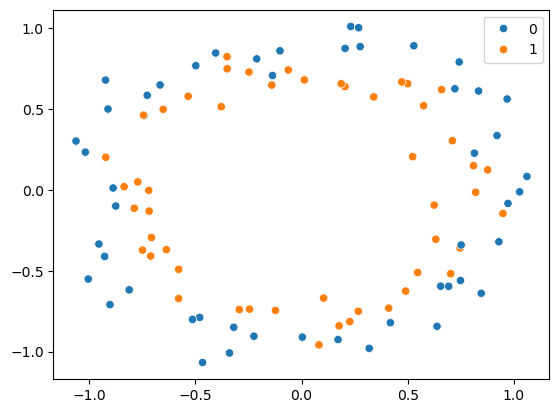

In [13]:
sns.scatterplot(x= X[:, 0],y=X[:, 1], hue=y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

d:\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,verbose=0)

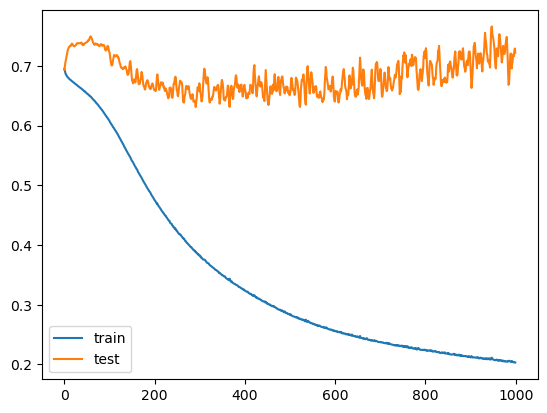

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step


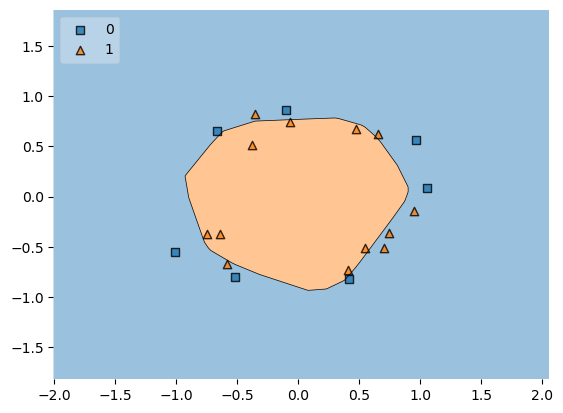

In [19]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

## Early stopping

In [20]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

d:\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.0001,         
    patience = 20,               #### Number of epochs with no improvement after which training will be stopped
    verbose = 1,                  #### for display messages for the early stop
    mode='auto',
    baseline=None,
    restore_best_weights = False

)

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks=callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.4242 - loss: 0.6927 - val_accuracy: 0.4000 - val_loss: 0.6993
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5602 - loss: 0.6871 - val_accuracy: 0.3500 - val_loss: 0.7054
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5695 - loss: 0.6815 - val_accuracy: 0.3500 - val_loss: 0.7107
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5070 - loss: 0.6857 - val_accuracy: 0.3500 - val_loss: 0.7137
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5383 - loss: 0.6829 - val_accuracy: 0.3500 - val_loss: 0.7179
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5031 - loss: 0.6872 - val_accuracy: 0.3500 - val_loss: 0.7216
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5188 - loss: 0.6838 - val_accuracy: 0.3500 - val_loss: 0.7253
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5227 - loss: 0.6824 - val_accuracy: 0.3500 - 

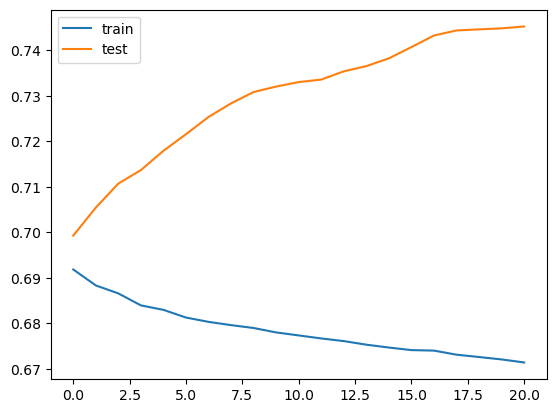

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step


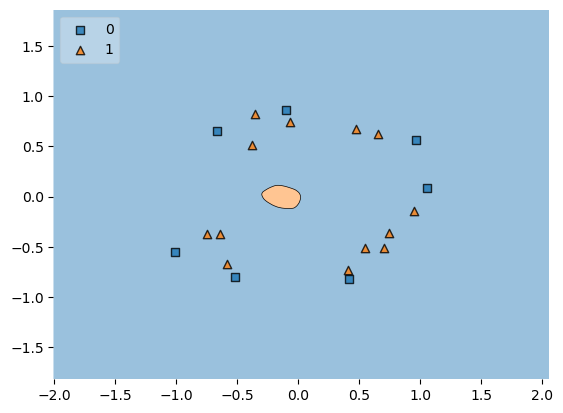

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()